In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate
from src import camvid
from src import evaluate
from src import predict
from src import predict_video
from src.tiramisu import epi_approx_tiramisu
%matplotlib inline
plt.style.use('dark_background')

Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# the location to save fine training weights to
weights = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to crop images to for fine tune training
crop_size = (352, 480)

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(),
    target_size=(360, 480),
    crop_size=crop_size,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


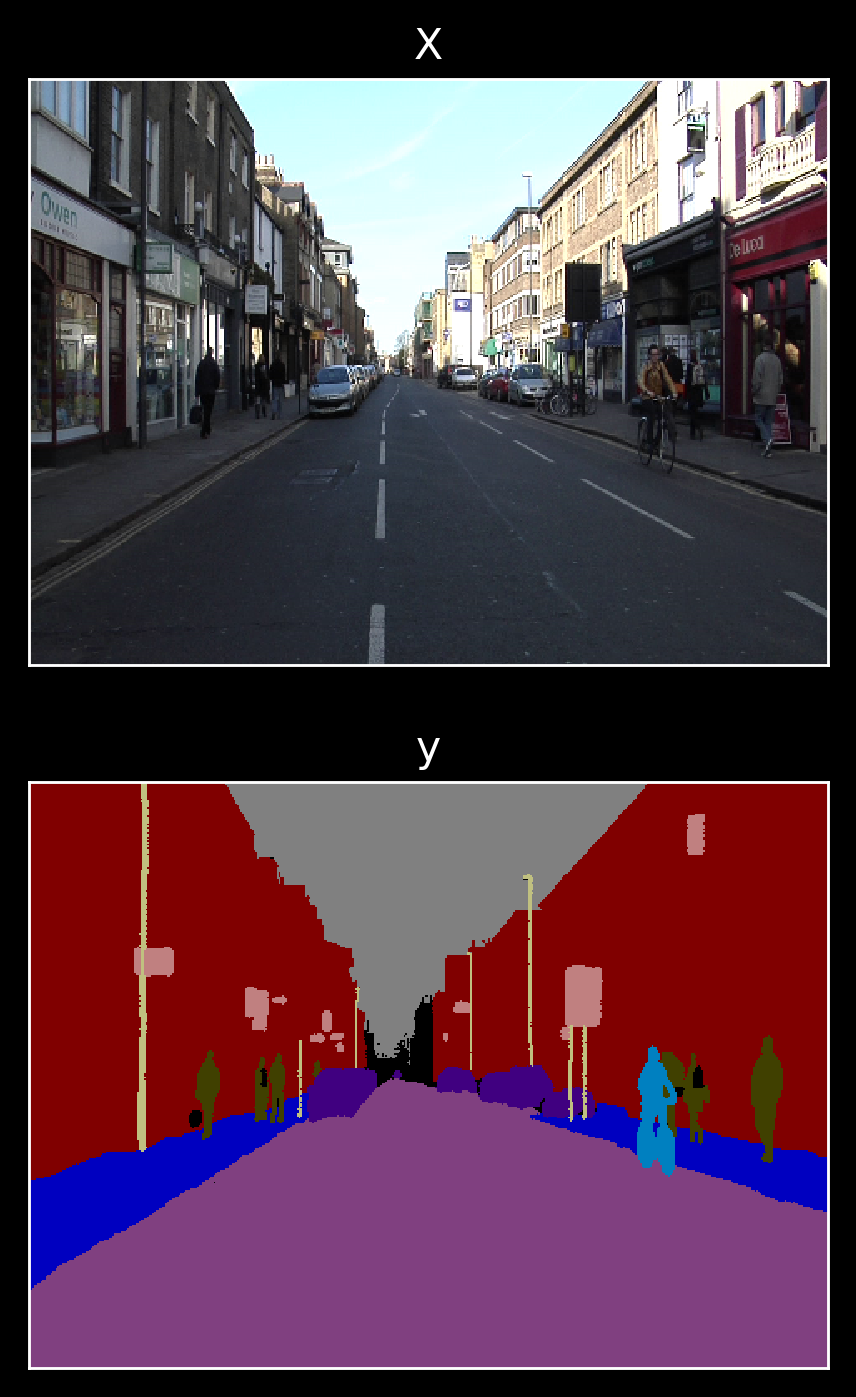

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = epi_approx_tiramisu.epi_approx_tiramisu((*crop_size, 3), camvid11.n, class_weights=camvid11.class_mask)
model.layers[1].load_weights(weights)

/users/PMIU0138/miu0212/neural-semantic-segmentation/src/tiramisu/epi_approx_tiramisu.py:72: UserWarning: Output "entropy" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "entropy" during training.
  metrics={'tiramisu': [build_categorical_accuracy(weights=class_weights)]},


# Test Metrics

In [7]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    label_map=camvid11.label_to_discrete_map
)
metrics

100%|██████████| 233/233 [01:21<00:00,  2.85step/s]


Test
Accuracy                 0.893861
Mean Per Class Accuracy  0.711902
Mean I/U                 0.551638
Bicyclist                0.283309
Building                 0.750968
Car                      0.628742
Column_Pole              0.298966
Fence                    0.179862
Pedestrian               0.390952
Road                     0.912307
Sidewalk                 0.797389
SignSymbol               0.209731
Sky                      0.916814
VegetationMisc           0.698974

In [8]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

| Metric                  |    Value |
|:------------------------|---------:|
| Accuracy                | 0.893861 |
| Mean Per Class Accuracy | 0.711902 |
| Mean I/U                | 0.551638 |
| Bicyclist               | 0.283309 |
| Building                | 0.750968 |
| Car                     | 0.628742 |
| Column_Pole             | 0.298966 |
| Fence                   | 0.179862 |
| Pedestrian              | 0.390952 |
| Road                    | 0.912307 |
| Sidewalk                | 0.797389 |
| SignSymbol              | 0.209731 |
| Sky                     | 0.916814 |
| VegetationMisc          | 0.698974 |


# Qualitative Results

## Train

In [9]:
X, y, p, s = predict.predict_epistemic(model, generators['train'], camvid11)

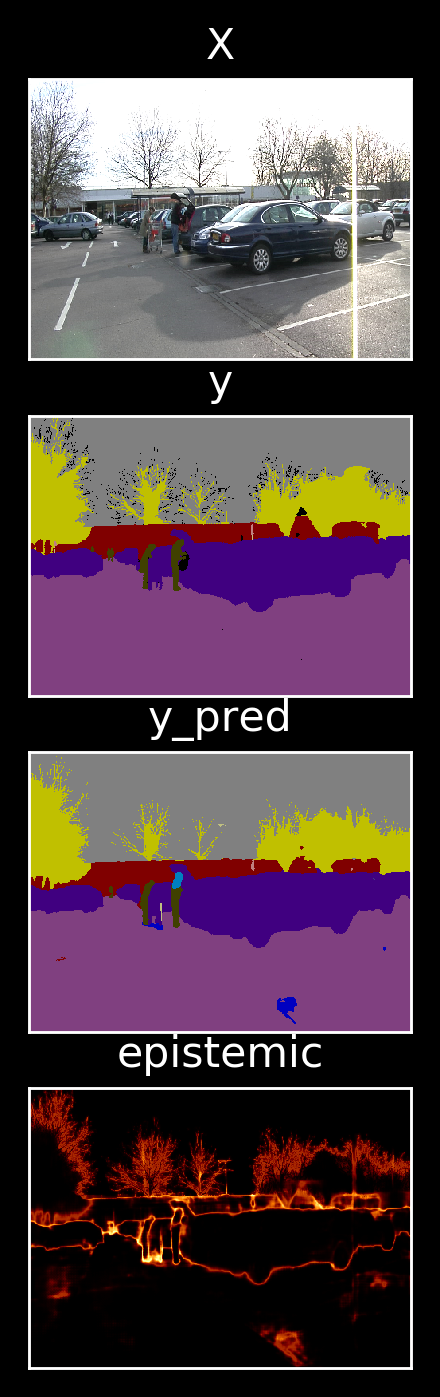

In [10]:
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

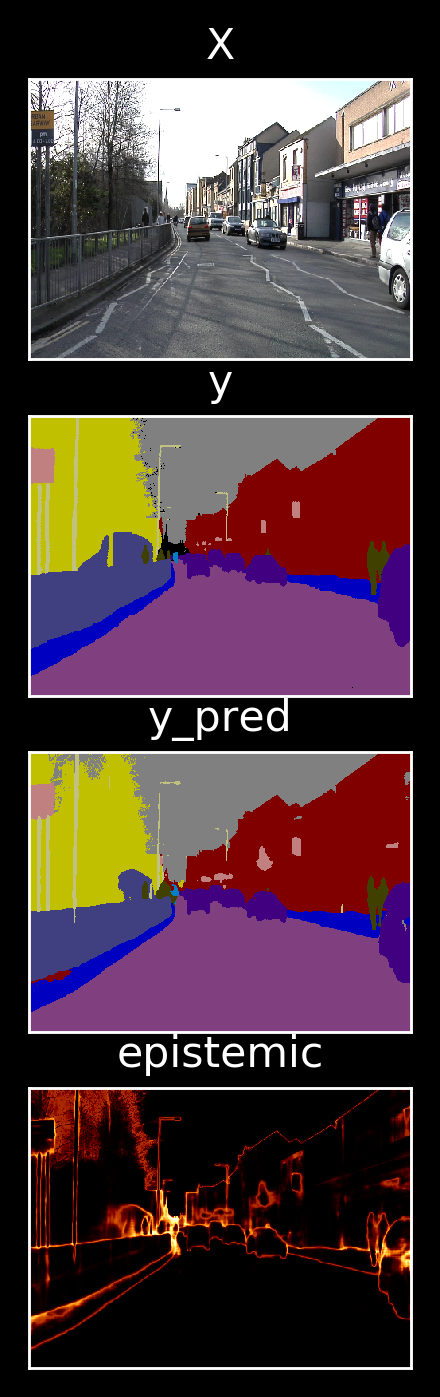

In [11]:
camvid.plot(X=X[1], y=y[1], y_pred=p[1], epistemic=s[1], order=['X', 'y', 'y_pred', 'epistemic'])

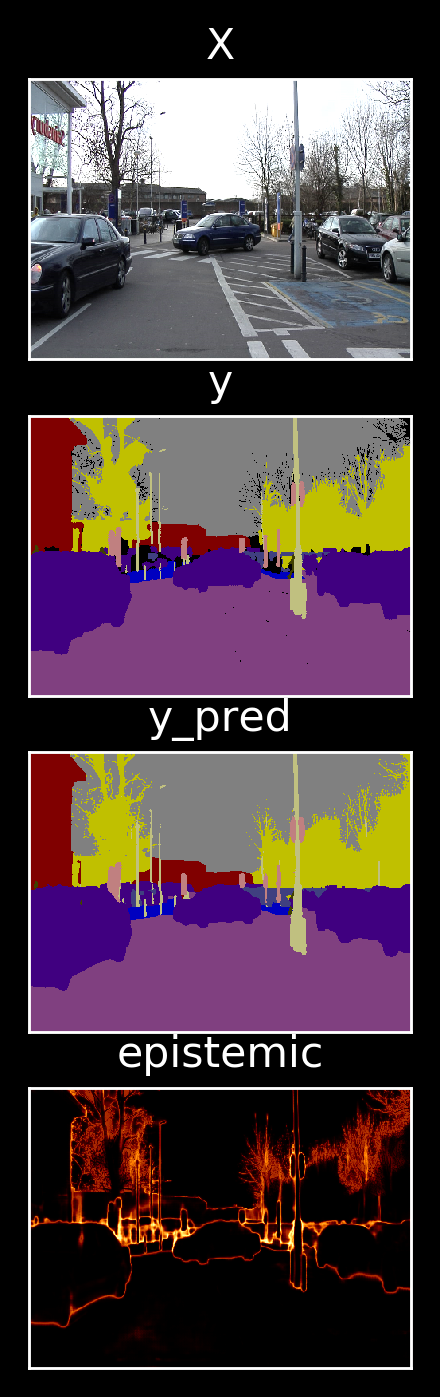

In [12]:
camvid.plot(X=X[2], y=y[2], y_pred=p[2], epistemic=s[2], order=['X', 'y', 'y_pred', 'epistemic'])

## Validation

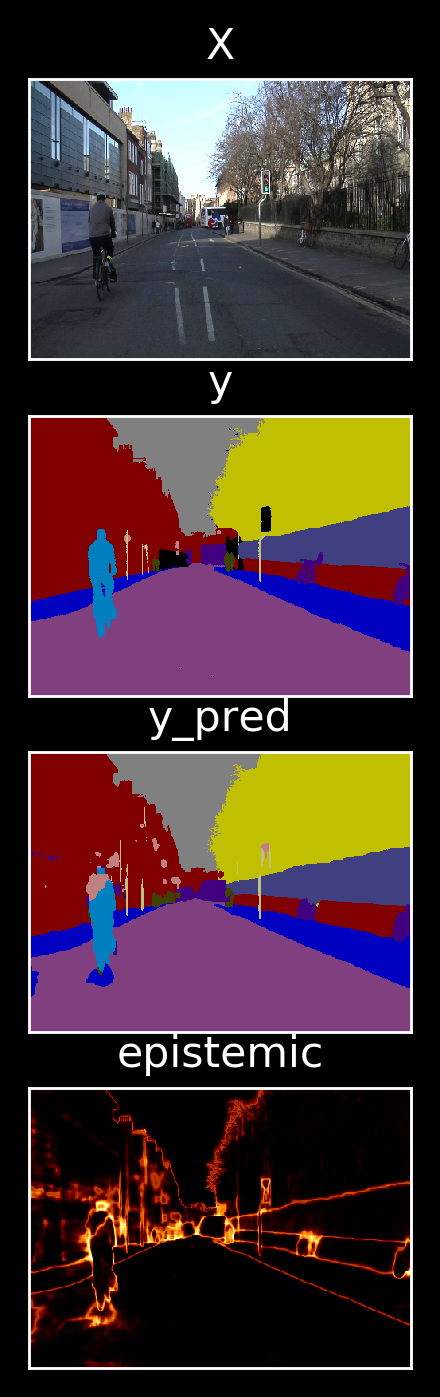

In [13]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

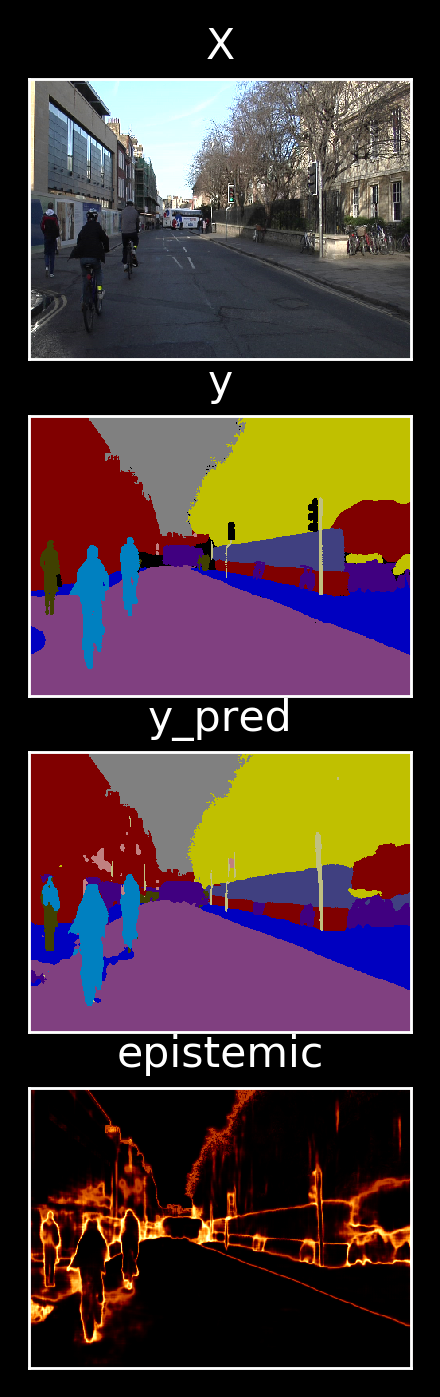

In [14]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

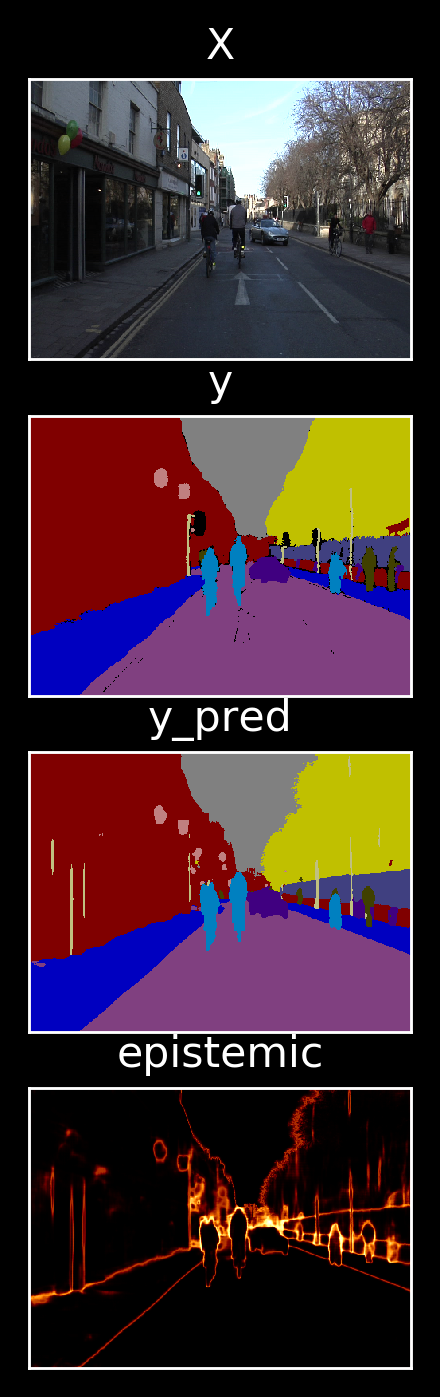

In [15]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

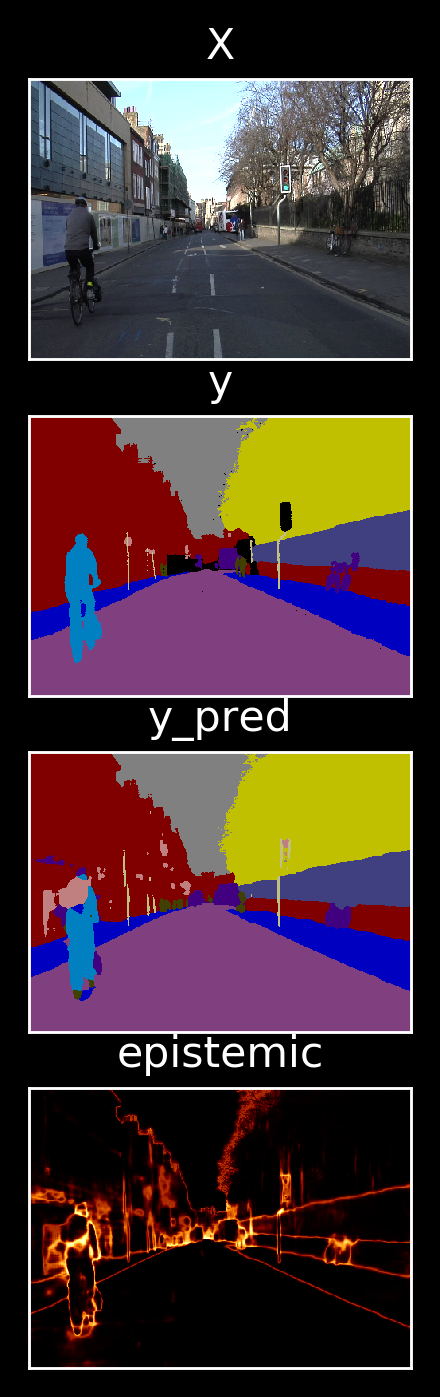

In [16]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

## Test

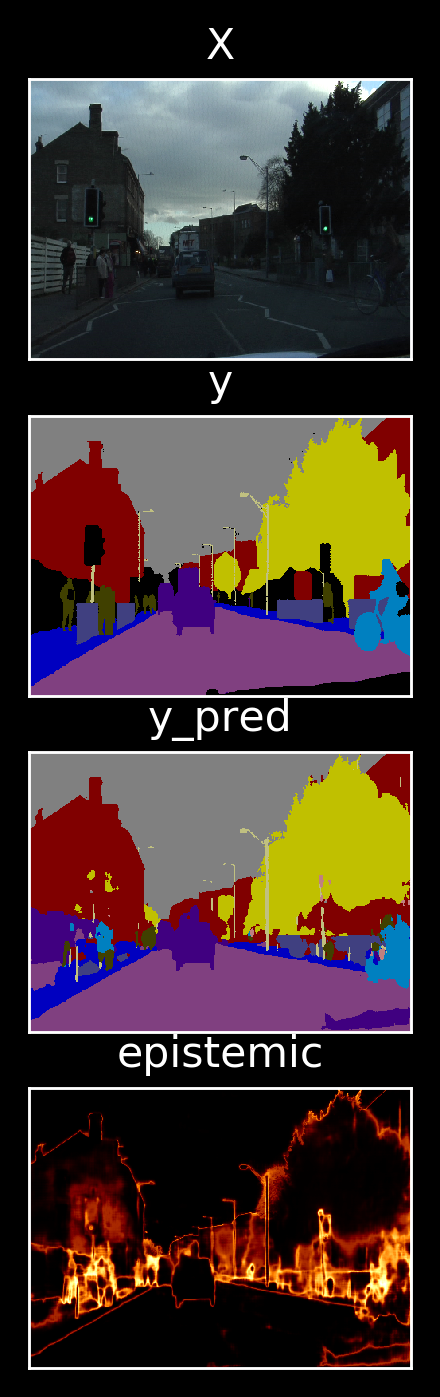

In [17]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
plt.savefig('img/bayesian-tiramisu/epistemic-approx/0.png')

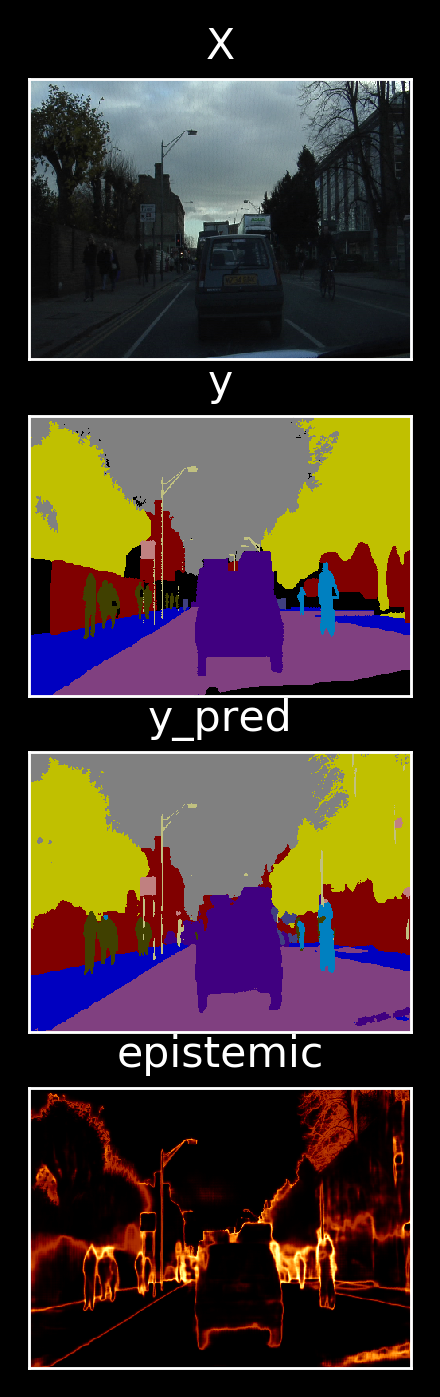

In [18]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
plt.savefig('img/bayesian-tiramisu/epistemic-approx/1.png')

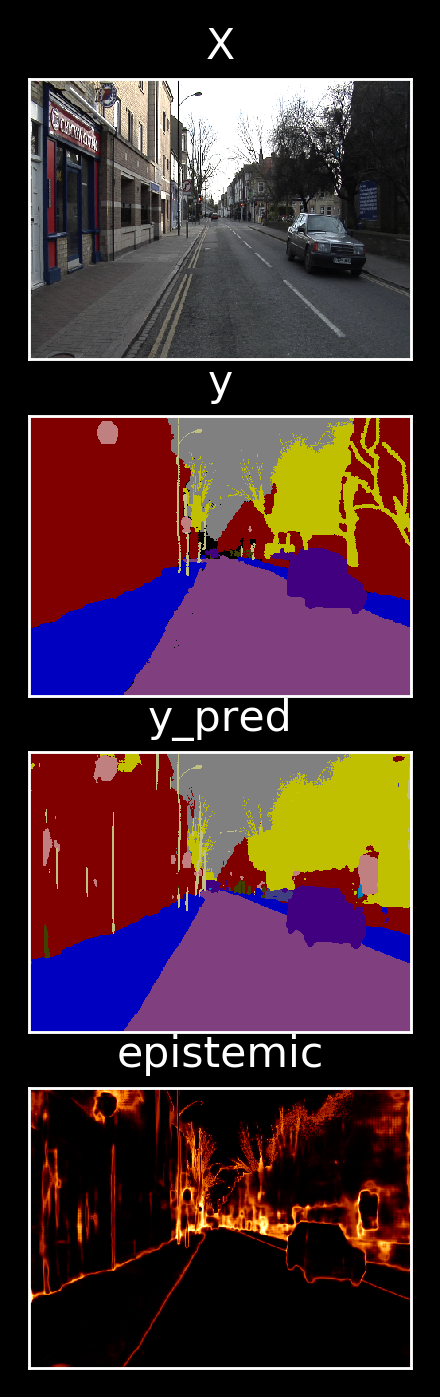

In [19]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
plt.savefig('img/bayesian-tiramisu/epistemic-approx/2.png')

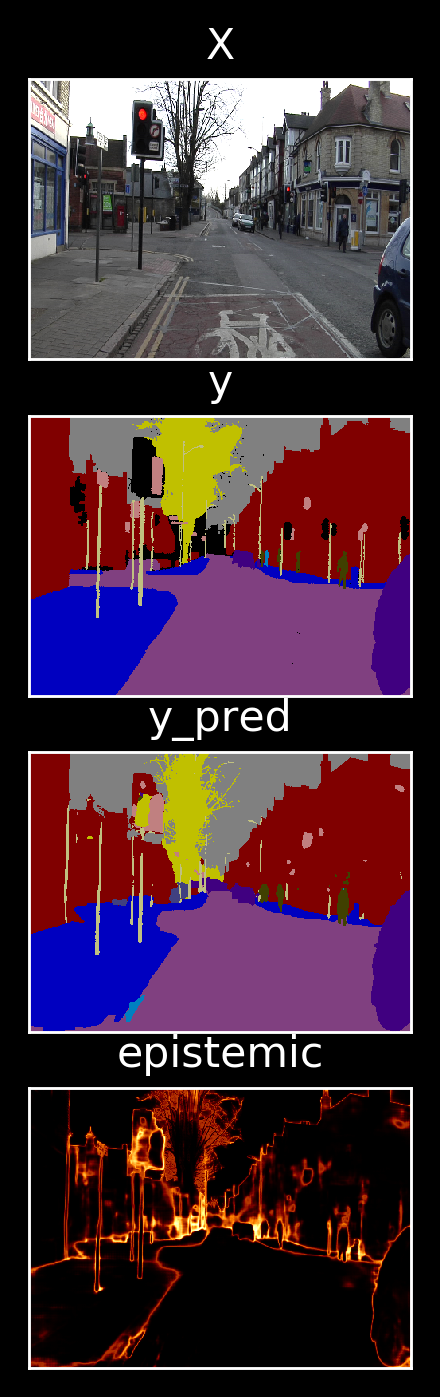

In [20]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
plt.savefig('img/bayesian-tiramisu/epistemic-approx/3.png')

# Video

In [21]:
video_file = '0005VD.mp4'
video_path = camvid.videos.abs_path(video_file)
out_path = 'img/bayesian-tiramisu/epistemic-approx/{}'.format(video_file)

In [22]:
predict_video.predict_video(video_path, out_path, camvid11, model, predict.predict_epistemic)

100%|██████████| 6600/6600 [26:40<00:00,  4.12it/s]
